In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
# Check for missing values
print(df.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [5]:
# Encoding categorical variable "Gender" to numerical values (1 for Male, 0 for Female)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [6]:
# Features and Target variable
X = df[['Age', 'EstimatedSalary']]  # Features
y = df['Purchased']  # Target variable

In [7]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Build the Logistic Regression Model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [10]:
# Model Evaluation
y_pred = classifier.predict(X_test)

In [11]:
# Accuracy
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.925


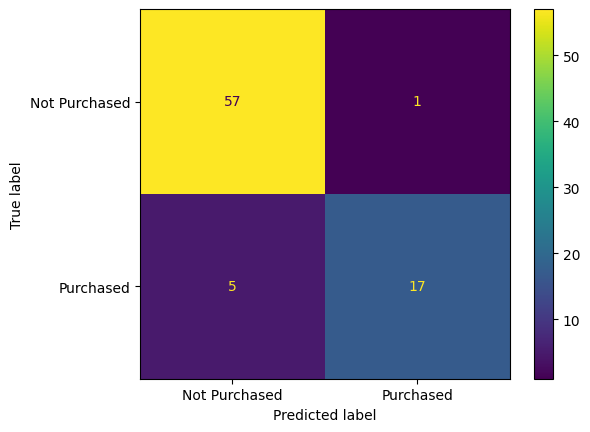

In [16]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_labels = ['Not Purchased', 'Purchased']
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_labels)
disp.plot()
plt.show()

In [13]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.94      0.77      0.85        22

    accuracy                           0.93        80
   macro avg       0.93      0.88      0.90        80
weighted avg       0.93      0.93      0.92        80



In [14]:
#Prediction: if a new person (age=30, estimated salary=50000) would buy the car

new_data = np.array([[30, 50000]]) 
new_data = scaler.transform(new_data) 
prediction = classifier.predict(new_data)
print(f'Prediction: {"Yes" if prediction[0] == 1 else "No"}')

Prediction: No


c:\Users\NEETI\Documents\College Documents\TE Assignments\Sem 6\DSBDA\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
